In [98]:
import os
import pandas as pd
data = '/kaggle/input/asl-dataset-aug/Dataset'

def create_dataframe(data_path):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders in the current data path
    folds = os.listdir(data_path)
    
    # Iterate through each subfolder
    for fold in folds:
        f_path = os.path.join(data_path, fold)
        imgs = os.listdir(f_path)
        
        # Iterate through images in the subfolder
        for img in imgs:
            img_path = os.path.join(f_path, img)
            
            # Append image path and corresponding label
            filepaths.append(img_path)
            labels.append(fold)

    # Create Pandas Series for filepaths and labels
    fseries = pd.Series(filepaths, name = 'Filepaths')
    lseries = pd.Series(labels, name = 'Labels')

    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrames for train, test, and val
df = create_dataframe(data)

In [99]:
print(df['Labels'].value_counts())

Labels
N    21
R    21
D    21
W    21
L    21
P    21
C    21
Z    21
V    21
T    21
O    21
A    21
G    21
S    21
Y    21
Q    21
K    21
X    21
M    21
U    21
E    21
H    21
F    21
I    21
B    21
J    21
Name: count, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
train_df, dummy_df = train_test_split(df,  train_size = 0.8, shuffle = True, random_state = 42, stratify = df['Labels'])
valid_df, test_df = train_test_split(dummy_df,  train_size = 0.5, shuffle = True, random_state = 42, stratify  = dummy_df['Labels'])
# The following are the splits:
# - train_df: Dataframe for training
# - test_df: Dataframe for testing
# - valid_df: Dataframe for validation

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , AdamW
from tensorflow.keras import regularizers

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,  # Rescale pixel values to [0, 1]
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale = 1. / 255)  # Only rescaling for validation and test
test_datagen = ImageDataGenerator(rescale = 1. / 255)
num_classes = 26
# Create flow_from_dataframe generators for train, validation, and test
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepaths',
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 50,
    class_mode = 'categorical',  # Use 'categorical' for multi-class classification
    shuffle = True,
    seed = 42,
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = valid_df,
    x_col = 'Filepaths',
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle = False,  # No need to shuffle validation data
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'Filepaths',
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle = False,  # No need to shuffle test data
)

Found 436 validated image filenames belonging to 26 classes.
Found 55 validated image filenames belonging to 26 classes.
Found 55 validated image filenames belonging to 26 classes.


In [103]:
len(valid_df['Labels'].value_counts())

26

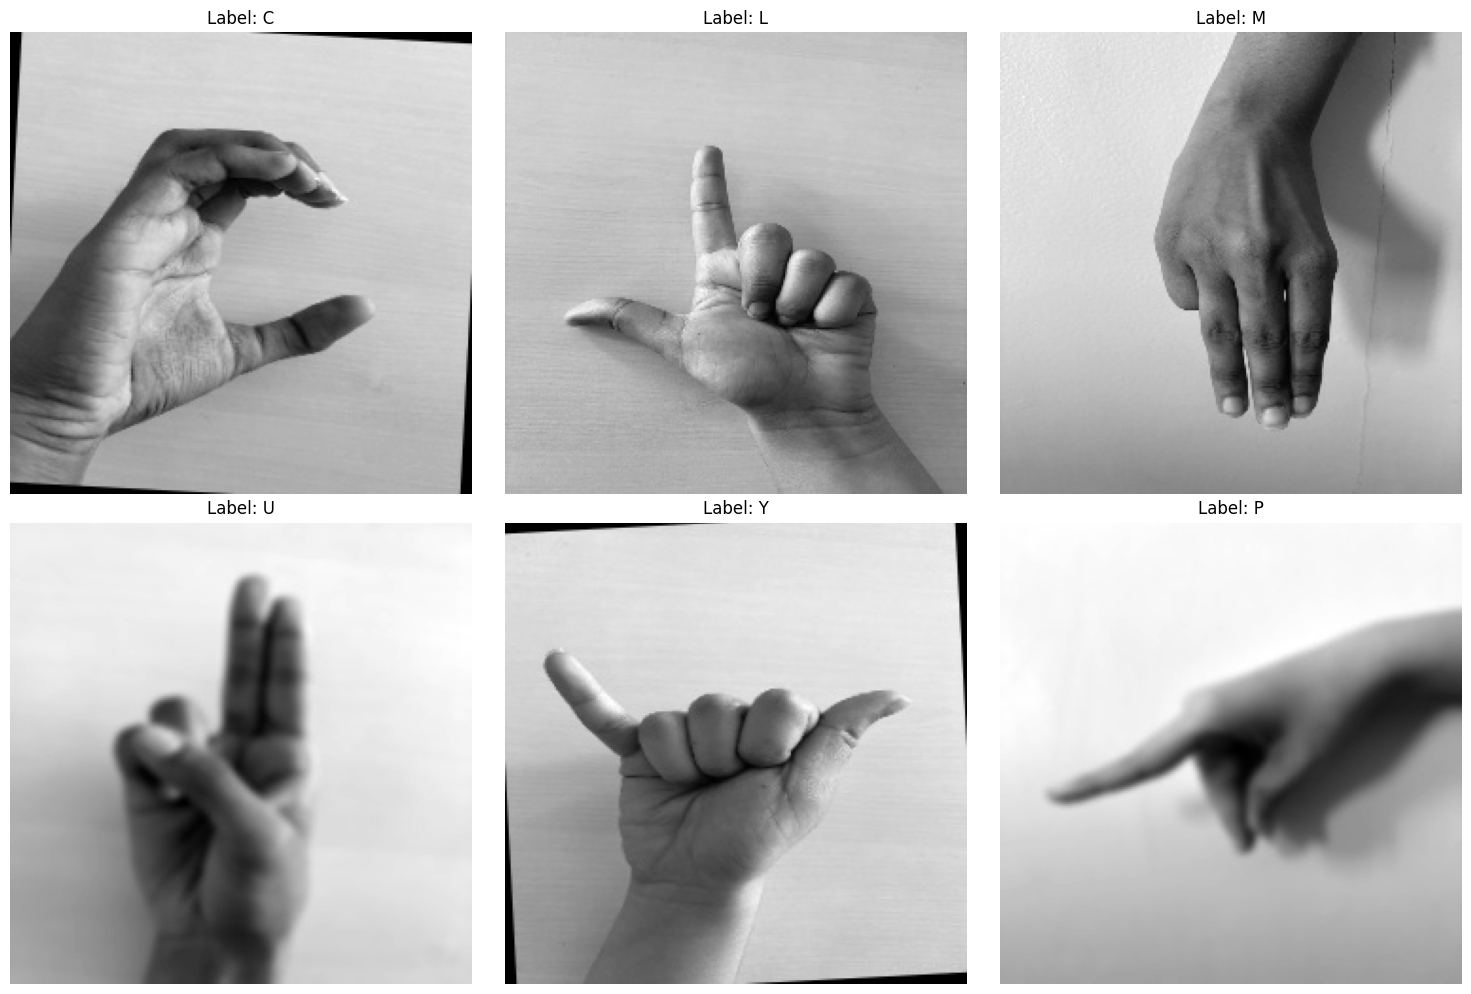

In [104]:
import random
import matplotlib.pyplot as plt
# Function to plot images with their labels
def plot_samples(df, num_samples = 6):
    plt.figure(figsize = (15, 10))
    for i in range(num_samples):
        # Randomly select an image
        rand_idx = random.randint(0, len(df) - 1)
        img_path = df.iloc[rand_idx]['Filepaths']
        label = df.iloc[rand_idx]['Labels']
        
        # Read and plot the image
        img = plt.imread(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap = 'gray')  # Specify the 'gray' colormap
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot 6 random samples
plot_samples(train_df)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 579ms/step - accuracy: 0.0219 - loss: 3.3666 - val_accuracy: 0.0364 - val_loss: 3.2689
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 545ms/step - accuracy: 0.0218 - loss: 3.3724 - val_accuracy: 0.0364 - val_loss: 3.2652
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 578ms/step - accuracy: 0.0371 - loss: 3.3485 - val_accuracy: 0.0364 - val_loss: 3.2636
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 536ms/step - accuracy: 0.0376 - loss: 3.3372 - val_accuracy: 0.0364 - val_loss: 3.2617
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.0520 - loss: 3.3113 - val_accuracy: 0.0364 - val_loss: 3.2580
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step - accuracy: 0.0435 - loss: 3.3251 - val_accuracy: 0.0364 - val_loss: 3.2551
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 544ms/step - accuracy: 0.0540 - loss: 3.3222 - val_accuracy: 0.0545 - val_loss: 3.2535
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 540ms/step - accuracy: 0.0463 - loss: 3.3062 - val_accuracy: 0.03

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 28800)          │       115,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 96)             │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 26)             │         2,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393,072 (43.46 MB)

 Trainable params: 3,778,490 (14.41 MB)

 Non-trainable params: 57,600 (225.00 KB)

 Optimizer params: 7,556,982 (28.83 MB)

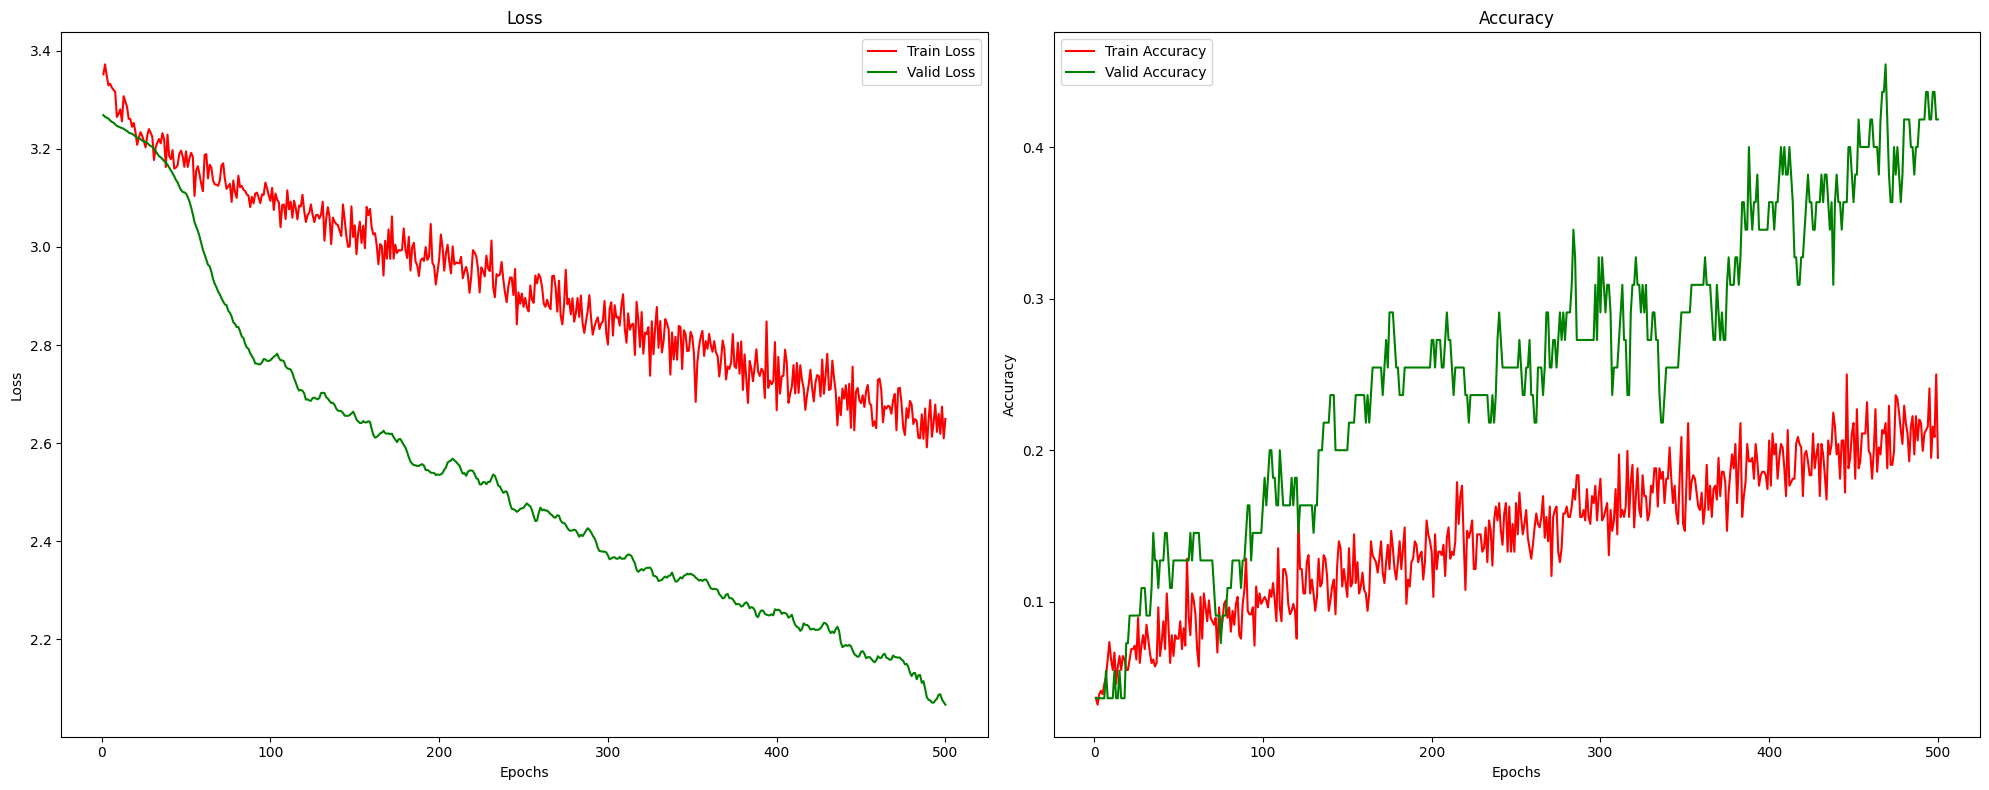

In [116]:
from tensorflow.keras import layers, models
# Define CNN model
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3), strides = 1, padding = 'valid'),
    # 1st Pooling Layer
    MaxPooling2D(pool_size = (2, 2)),
    # 2nd Convolutional Layer
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', strides = 1, padding = 'valid'),
    # 2nd Pooling Layer
    MaxPooling2D(pool_size = (2, 2)),
    # Flatten the output from the convolutional layers
    Flatten(),
    BatchNormalization(),
    # 1st Densely Connected Layer
    Dense(128, activation = 'relu'),
    # Add dropout layer for regularization
    Dropout(0.3),
    # 2nd Densely Connected Layer
    Dense(96, activation = 'relu'),
    # Add dropout layer for regularization
#     Dropout(0.5),
    # 3rd Densely Connected Layer
    Dense(96, activation = 'relu'),
    # Add dropout layer for regularization
    Dropout(0.3),
    # Final Layer with softmax activation for classification
    Dense(26, activation = 'softmax')
])

# Define the learning rate
learning_rate = 0.00001  # You can adjust this value as needed

# Create an Adam optimizer with the specified learning rate
optimizer = AdamW(learning_rate = learning_rate)

# Compile the model with the optimizer and loss function
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model with early stopping
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 500,
    verbose = 1,
#     callbacks = [early_stopping]  # Add early stopping callback
)

# Print the model summary
model.summary()

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i + 1 for i in range(len(tr_acc))]

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label = 'Train Loss')
plt.plot(epochs, val_loss, 'g', label = 'Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [117]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3061 - loss: 2.1939 
Test Accuracy: 0.30909091234207153


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


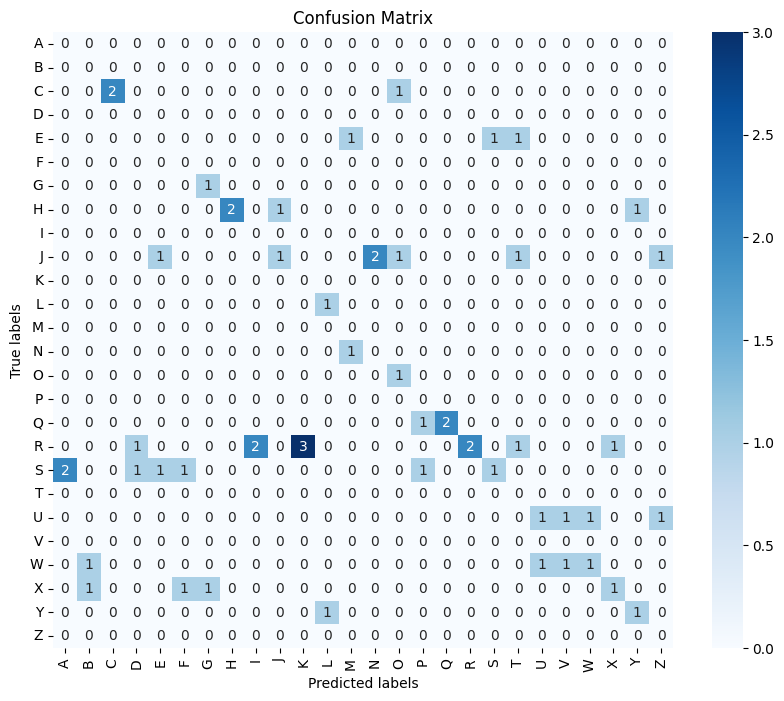


Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.00      0.00      0.00         2
           C       0.67      1.00      0.80         2
           D       0.00      0.00      0.00         2
           E       0.00      0.00      0.00         2
           F       0.00      0.00      0.00         2
           G       1.00      0.50      0.67         2
           H       0.50      1.00      0.67         2
           I       0.00      0.00      0.00         2
           J       0.14      0.50      0.22         2
           K       0.00      0.00      0.00         3
           L       1.00      0.50      0.67         2
           M       0.00      0.00      0.00         2
           N       0.00      0.00      0.00         2
           O       1.00      0.33      0.50         3
           P       0.00      0.00      0.00         2
           Q       0.67      1.00      0.80         2
   

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Assuming you have already trained your model and obtained predictions
# X_test: Test images, y_test: True labels, model: Trained CNN model

# Get predictions for the test set
y_pred = np.argmax(model.predict(test_generator), axis = -1)

# Get class indices from the test generator
class_indices = test_generator.class_indices

# Map class indices to class names
class_names = {v: k for k, v in class_indices.items()}

# Sort class names based on their indices
class_names = [class_names[i] for i in sorted(class_names.keys())]

# Print confusion matrix
conf_matrix = confusion_matrix(y_pred, test_generator.classes)

# Plot confusion matrix
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation = 'vertical')
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation = 'horizontal')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(test_generator.classes, y_pred, target_names = class_names))

In [119]:
base_folder = '/kaggle/input/isl-dataset/ISL_Final'
isl_dict = {}
for folder in os.listdir(base_folder):
    key = folder[-1]
    image_path = (base_folder + "/" + folder)
    im_no = random.randrange(0, 45)
    value = image_path + "/" + os.listdir(image_path)[im_no]
    isl_dict[key] = value 

In [120]:
alpha_map = [ chr(ord('A') + i) for i in range(0, 26)]

In [121]:
alpha_map[0]

'A'

In [122]:
isl_dict

{'M': '/kaggle/input/isl-dataset/ISL_Final/ISL_M/ISL_M_2_brightness_1.jpeg',
 'P': '/kaggle/input/isl-dataset/ISL_Final/ISL_P/ISL_P_3_brightness_3.jpeg',
 'I': '/kaggle/input/isl-dataset/ISL_Final/ISL_I/ISL_I_2_flip_2.jpeg',
 'W': '/kaggle/input/isl-dataset/ISL_Final/ISL_W/ISL_W_3_flip_3.jpeg',
 'T': '/kaggle/input/isl-dataset/ISL_Final/ISL_T/ISL_T_3_brightness_3.jpeg',
 'B': '/kaggle/input/isl-dataset/ISL_Final/ISL_B/ISL_B _2_brightness_0.jpeg',
 'K': '/kaggle/input/isl-dataset/ISL_Final/ISL_K/ISL_K_1_flip_0.jpeg',
 'Y': '/kaggle/input/isl-dataset/ISL_Final/ISL_Y/ISL_Y_2_flip_4.jpeg',
 'D': '/kaggle/input/isl-dataset/ISL_Final/ISL_D/ISL_D_2_rotation_1.jpeg',
 'Z': '/kaggle/input/isl-dataset/ISL_Final/ISL_Z/ISL_Z_1_brightness_4.jpeg',
 'N': '/kaggle/input/isl-dataset/ISL_Final/ISL_N/ISL_N_2_brightness_3.jpeg',
 'A': '/kaggle/input/isl-dataset/ISL_Final/ISL_A/ISL_A_3_flip_3.jpeg',
 'F': '/kaggle/input/isl-dataset/ISL_Final/ISL_F/ISL_F_1_flip_1.jpeg',
 'C': '/kaggle/input/isl-dataset/ISL

In [123]:
# importing required libraries 
import matplotlib.pyplot as plt 
import matplotlib.image as img

def displayISL(predicted_alphabet):
    # reading the image 
    testImage = img.imread(isl_dict[predicted_alphabet]) 
    
    # displaying the image 
    plt.imshow(testImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R


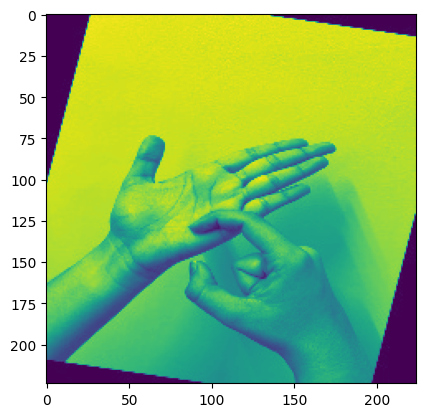

In [125]:
import cv2
import numpy as np

# Load the image
image_path = '/kaggle/input/asl-dataset-aug/Dataset/R/R.jpg4.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))  # Resize to match model input shape
image = np.expand_dims(image, axis = 0)  # Add batch dimension
image = image / 255.0  # Normalize pixel values
# Predict the class probabilities for the image
predictions = model.predict(image)

# Get the predicted class label
predicted_class = np.argmax(predictions)

print(alpha_map[predicted_class])
# displayISL(predicted_class)
displayISL(alpha_map[predicted_class])